In [1]:
from bs4 import BeautifulSoup
import requests
import time
import datetime


import smtplib #used for sending emails to ourselves

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-us"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-na.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<!-- sp:end-feature:cs-optimization -->
<script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.slice.call(arguments),e.
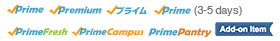

In [6]:
#tell beautifulSoup and requests where we are actually getting this data from
# connect to website
URL = 'https://www.amazon.com/TeeINKS-Keanu-Breathtaking-Reeves-Medium/dp/B07SRW2X9W/ref=sr_1_6?keywords=keanu+reeves+shirt&qid=1647568389&sr=8-6'

headers={"User-Agent": "Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.51 Safari/537.36","Accept-Encoding": "gzip, deflate","Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8","DNT":"1","Connection":"close","Upgrade-Insecure-Requests": "1"} 
     
page=requests.get(URL, headers=headers)# here we start getting or bringing in the data

soup1 = BeautifulSoup(page.content, "html.parser")

print(soup1)
# with this print we have pulled in all the html from the amazon webpage

    

<!DOCTYPE html>

<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-us">
<!-- sp:feature:head-start -->
<head>
<script>
   var aPageStart = (new Date()).getTime();
  </script>
<meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<script type="text/javascript">
   var ue_t0=ue_t0||+new Date();
  </script>
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-na.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<!-- sp:end-feature:cs-optimization -->
<script type="text/javascript">
   window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.sli
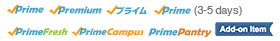

In [7]:
# in order to make html of the above code look better formatted
soup2= BeautifulSoup(soup1.prettify(),'html.parser')
print(soup2)

In [8]:
#getting title of our product in the webpage
title=soup2.find(id='productTitle').get_text()
print(title)


                   TeeINKS Keanu You're Breathtaking! Reeves White T Shirt
                  


In [9]:
rating=soup2.find(id="acrCustomerReviewText").get_text()
print(rating)


                    23 ratings
                   


In [10]:
title=title.strip()[0:]
rating=rating.strip()[0:]
print(title)
print(rating)
type(rating)

TeeINKS Keanu You're Breathtaking! Reeves White T Shirt
23 ratings


str

In [11]:
import datetime
today=datetime.date.today()
print(today)

2022-03-18


In [12]:
#create csv, insert it into the csv, create a process to append more data into the csv

import csv
Header = ['title','rating','date_added']
data= [title,rating,today]                #these codes create csv
type(data)

#we are going to create an excel csv
with open('keanureevestshirtwebscraper.csv','w',newline='',encoding='UTF8') as f:
    writer=csv.writer(f)  # this is just for inital insertion of data into csv #create csv
    writer.writerow(Header) #insert header
    writer.writerow(data)  #insert data
    
#newline- when we insert the data it doesn't have a space between each csv

In [17]:
import pandas as pd
df=pd.read_csv(r'C:\Users\RAHUL\keanureevestshirtwebscraper.csv')
df

,title,rating,date_added
0,TeeINKS Keanu You're Breathtaking! Reeves Whit...,23 ratings,2022-03-18
1,TeeINKS Keanu You're Breathtaking! Reeves Whit...,23 ratings,2022-03-18
2,TeeINKS Keanu You're Breathtaking! Reeves Whit...,23 ratings,2022-03-18


In [16]:
#the below codes append data to csv

#with open('keanureevestshirtwebscraper.csv','a+',newline='',encoding='UTF8') as f:
 #   writer=csv.writer(f)  
  #  writer.writerow(data)  

#we don't want to run this code daily, we want a way where it does it in the background
#of our laptop and is easy to do basically automate this

In [18]:
def check_ratings():
    URL = 'https://www.amazon.com/TeeINKS-Keanu-Breathtaking-Reeves-Medium/dp/B07SRW2X9W/ref=sr_1_6?keywords=keanu+reeves+shirt&qid=1647568389&sr=8-6'

    headers={"User-Agent": "Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.51 Safari/537.36","Accept-Encoding": "gzip, deflate","Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8","DNT":"1","Connection":"close","Upgrade-Insecure-Requests": "1"} 
     
    


    page=requests.get(URL, headers=headers)

    soup1 = BeautifulSoup(page.content, "html.parser")
    
    soup2= BeautifulSoup(soup1.prettify(),"html.parser")
    
    title=soup2.find(id='productTitle').get_text()
    
    rating=soup2.find(id="acrCustomerReviewText").get_text()
    
    title=title.strip()[0:]
    
    rating=rating.strip()[0:]
    
    import datetime
    today=datetime.date.today()
    
    import csv
    Header = ['title','rating','date_added']
    data= [title,rating,today]  
    
    with open('keanureevestshirtwebscraper.csv','a+',newline='',encoding='UTF8') as f:
        writer=csv.writer(f) 
        writer.writerow(data) 


    

In [21]:
#WE are going to put this check_ratings() function into a timer
while(True):
    check_ratings()
    time.sleep(2) #means every 2 sec it runs through the entire process of check_ratings function

KeyboardInterrupt: 

In [22]:
import pandas as pd
df=pd.read_csv(r'C:\Users\RAHUL\keanureevestshirtwebscraper.csv')
df

,title,rating,date_added
0,TeeINKS Keanu You're Breathtaking! Reeves Whit...,23 ratings,2022-03-18
1,TeeINKS Keanu You're Breathtaking! Reeves Whit...,23 ratings,2022-03-18
2,TeeINKS Keanu You're Breathtaking! Reeves Whit...,23 ratings,2022-03-18
3,TeeINKS Keanu You're Breathtaking! Reeves Whit...,23 ratings,2022-03-18
4,TeeINKS Keanu You're Breathtaking! Reeves Whit...,23 ratings,2022-03-18
5,TeeINKS Keanu You're Breathtaking! Reeves Whit...,23 ratings,2022-03-18
